Car Price Prediction

The problem at hand is to model the Selling Price of used cars based on the features given in the datasets. 

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\luisn\.conda\envs\daa2\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\luisn\.conda\envs\daa2\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\luisn\.conda\envs\daa2\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


About the data
car_data.csv

Model: Model name of the car that is sold.

Selling Price: The selling price of the car. This is our target feature.

Kilometers Driven: Number of kilometers that the car has already driven.

Year: Year of purchase of the car.

Owner: Information on a number of the previous owners.

Fuel Type: Fuel type of car.

Transmission: Transmission type of car.

Insurance: Insurance information of the car.

Car Condition: Current car condition. A rating out of 5.


model_data.csv
Model: Model name of the car that is sold.
Current Price: Current price of the car.

In [2]:
car_data = pd.read_csv('car_data.csv')
model_data = pd.read_csv('model_data.csv')

In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 9 columns):
Model                2237 non-null object
Selling Price        2237 non-null int64
Kilometers Driven    2237 non-null int64
Year                 2237 non-null int64
Owner                2237 non-null object
Fuel Type            2237 non-null object
Transmission         2237 non-null object
Insurance            2223 non-null object
Car Condition        2237 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 157.4+ KB


In [4]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 2 columns):
Model            434 non-null object
Current Price    433 non-null object
dtypes: object(2)
memory usage: 6.9+ KB


In [5]:
car_data.head()

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition
0,MarutiWagonR1.0LXI,312165,82238,2014,First Owner,Petrol + CNG,MANUAL,Expired,4.2
1,ToyotaEtiosLiva,313799,30558,2013,First Owner,Petrol,MANUAL,12-09-2021,4.4
2,MarutiAlto800,295999,22164,2018,First Owner,Petrol,MANUAL,01-12-2020,4.8
3,MarutiSwift,435199,30535,2013,First Owner,Diesel,MANUAL,Comp,4.3
4,MarutiWagonR1.0,289099,15738,2013,First Owner,Petrol,MANUAL,11-08-2021,4.3


In [6]:
model_data.head()

,Model,Current Price
0,HyundaiElitei20Sportz(O)1.4CRDi,Rs.7.69 Lakh
1,MarutiErtigaZXISMARTHYBRID,Rs.9.27 Lakh
2,MarutiVitaraBrezzaLDI,"Rs.7,62,742"
3,FordEcosport1.5TITANIUMTIVCT,Rs.7.64 Lakh
4,HyundaiVernaFLUIDIC1.4CRDI,"Rs.9,99,900"


In [7]:
len(car_data['Model'].unique())

434

In [8]:
len(model_data['Model'].unique())

434

In [9]:
model_data['Model'].duplicated().any()

False

Since our datasets match, and there is no duplicated values in our model_data dataset we can performe an inner-join in our data.
We will add the atribute 'Current Price' from our ´model_data´ dataset to our ´car_data´ dataset using the 'Model' atribute as a way to performe the inner-join.

In [10]:
car_data = pd.merge(car_data, model_data ,on='Model')

In [11]:
car_data.head()

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition,Current Price
0,MarutiWagonR1.0LXI,312165,82238,2014,First Owner,Petrol + CNG,MANUAL,Expired,4.2,Rs.4.65 Lakh
1,MarutiWagonR1.0LXI,242499,88514,2015,Second Owner,Petrol + CNG,MANUAL,26-07-2021,4.4,Rs.4.65 Lakh
2,MarutiWagonR1.0LXI,381699,29735,2017,Second Owner,Petrol + CNG,MANUAL,18-09-2021,4.3,Rs.4.65 Lakh
3,MarutiWagonR1.0LXI,181999,153709,2013,First Owner,Petrol + CNG,MANUAL,25-05-2021,4.1,Rs.4.65 Lakh
4,MarutiWagonR1.0LXI,239499,88691,2012,Second Owner,Petrol + CNG,MANUAL,15-10-2021,4.4,Rs.4.65 Lakh


In [12]:
car_data.describe()

,Selling Price,Kilometers Driven,Year,Car Condition
count,2.237000e+03,2237.000000,2237.000000,2237.000000
mean,4.184431e+05,61928.605275,2013.763523,4.370854
std,2.280516e+05,42260.955917,2.874686,0.288990
min,7.529900e+04,913.000000,2006.000000,3.000000
25%,2.720990e+05,32137.000000,2012.000000,4.200000
50%,3.557990e+05,55430.000000,2014.000000,4.300000
75%,5.032990e+05,83427.000000,2016.000000,4.600000
max,1.952397e+06,855881.000000,2020.000000,5.000000


In [13]:
car_data['Kilometers Driven'].value_counts()

85362    2
34760    2
65667    2
66476    2
37296    2
        ..
8889     1
19130    1
99003    1
39612    1
32768    1
Name: Kilometers Driven, Length: 2221, dtype: int64

In [14]:
# Looking ate the unique values of categorical features
print(car_data['Model'].unique())
print(car_data['Owner'].unique())
print(car_data['Fuel Type'].unique())
print(car_data['Transmission'].unique())
print(car_data['Insurance'].unique())

['MarutiWagonR1.0LXI' 'ToyotaEtiosLiva' 'MarutiAlto800' 'MarutiSwift'
 'MarutiWagonR1.0' 'HyundaiElitei20ASTA1.2'
 'HyundaiGrandi10SPORTZ1.2KAPPA' 'HyundaiElitei20ASTA' 'MarutiCelerio'
 'MarutiSwiftDzireVXI1.2BS' 'MarutiDzire' 'HondaCivic1.8S'
 'MarutiAltoK10VXI' 'MarutiAlto800LXI' 'HyundaiVernaFLUIDIC1.6EX'
 'ToyotaEtiosCROSS1.4' 'HondaCitySVCVT' 'VolkswagenVentoHIGHLINE'
 'Hyundaii20MAGNAO' 'VolkswagenPoloGT' 'MahindraTUV300'
 'HondaAmaze1.5VCVT' 'TataNanoXT' 'RenaultKwid' 'MarutiAltoK10'
 'HyundaiElitei20SPORTZ' 'MarutiZenEstilo' 'MarutiCelerioZXI'
 'MarutiSwiftDzireVDIBS' 'MarutiBalenoALPHA1.2' 'MarutiSwiftVDI'
 'TataTiagoXT1.2' 'MahindraBoleroPower+' 'HyundaiElitei20MAGNA1.4'
 'MarutiSX4' 'MarutiBalenoDELTA1.2K12' 'MarutiSwiftVXI' 'HondaCityVMT'
 'MahindraXUV500W8' 'HyundaiVENUE1.4CRDIMT' 'Hyundaii20MAGNAO1.4'
 'FordEcosport1.5TITANIUMTI' 'Hyundaii10SPORTZ1.2' 'HondaBrio1.2VMTI'
 'MarutiErtigaZXISMARTHYBRID' 'HondaCityVXMT' 'MahindraScorpioS6'
 'HyundaiVENUE1.0LTurboGDISX(O)' 'Hon

In [15]:
car_data.isnull().sum()

Model                 0
Selling Price         0
Kilometers Driven     0
Year                  0
Owner                 0
Fuel Type             0
Transmission          0
Insurance            14
Car Condition         0
Current Price         2
dtype: int64

Lets delete the 2 Current Price which are null. 

In [16]:
print("Shape of car_data before dropping Rows with NULL values in Current Price : ",car_data.shape)
car_data = car_data[car_data['Current Price'].notna()]
print("Shape of car_data after dropping Rows with NULL values in Current Price : ",car_data.shape)

#car_data['Insurance'] = car_data['Insurance'].fillna(0)
#print("Shape of car_data after changing Rows with NULL values in Insurance to 0: ",car_data.shape)


Shape of car_data before dropping Rows with NULL values in Current Price :  (2237, 10)
Shape of car_data after dropping Rows with NULL values in Current Price :  (2235, 10)


Checking if we have any null values left to treat:

In [17]:
car_data.isnull().sum()

Model                 0
Selling Price         0
Kilometers Driven     0
Year                  0
Owner                 0
Fuel Type             0
Transmission          0
Insurance            14
Car Condition         0
Current Price         0
dtype: int64

Now we need to fix the absent indexes brought upon by using the .notna() (e.g. if the row number 69 was dropped then the row after number 68 would have the index 70):

In [18]:
print(car_data.shape)
car_data = car_data.reset_index(drop=True)
print(car_data.shape)

(2235, 10)
(2235, 10)


Let's inspect to see if we can find some sort of relation between 'Kilometeres Driven' and 'Selling Price':

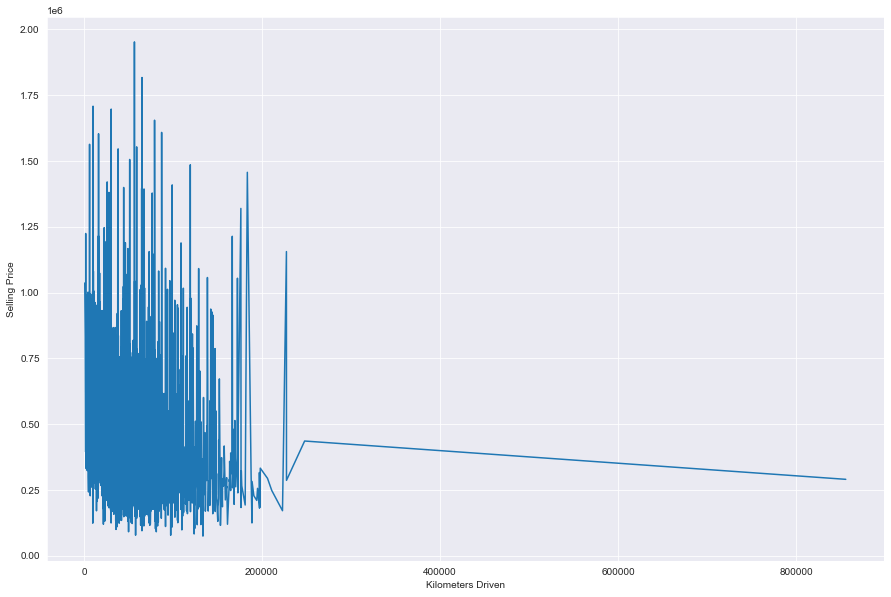

In [19]:
palette_lp = sns.color_palette("mako_r", 6)
sns.set_style("darkgrid")
plt.figure(figsize=(15,10))
sns.lineplot(data = car_data, x = "Kilometers Driven", y = "Selling Price")

Lets try to correlate fuel type and price:

In [20]:
car_data['Fuel Type'].describe()

count       2235
unique         4
top       Petrol
freq        1382
Name: Fuel Type, dtype: object

<function matplotlib.pyplot.show(*args, **kw)>

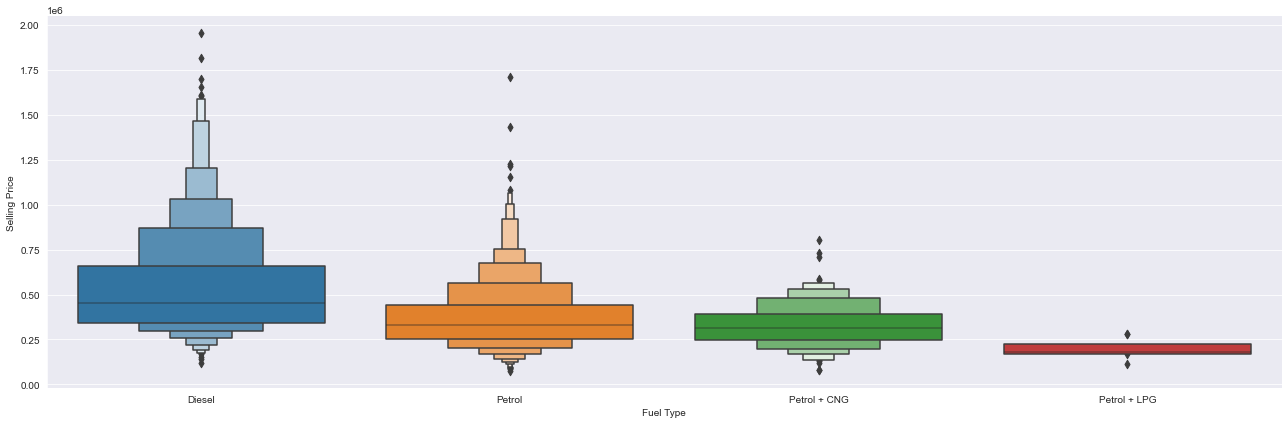

In [21]:
sns.catplot(y='Selling Price',x='Fuel Type',data= car_data.sort_values('Selling Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

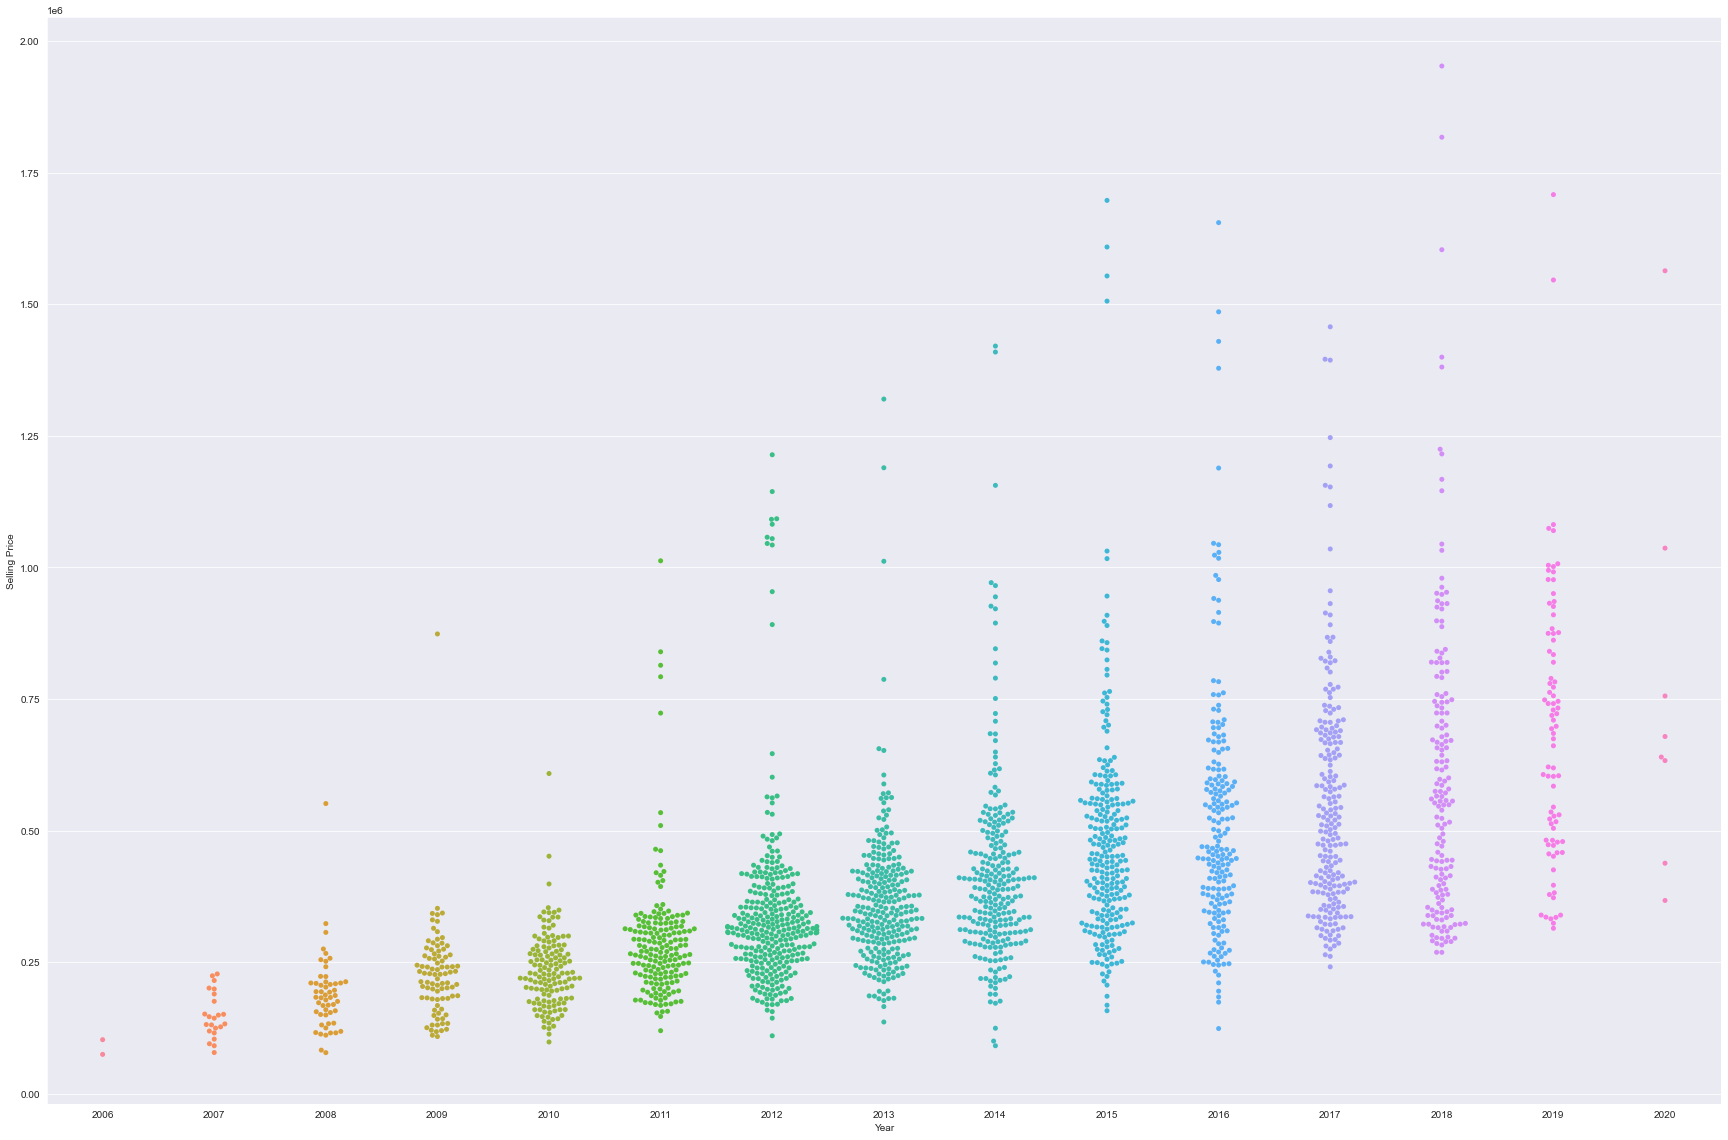

In [22]:
fig, _ = plt.subplots()
fig.set_size_inches(30, 20)
sns.swarmplot(x = 'Year', y ='Selling Price', data = car_data)

We can clearly see that both 'Fuel Type' and 'Year' atributes strongly correlate with 'Selling Price'.

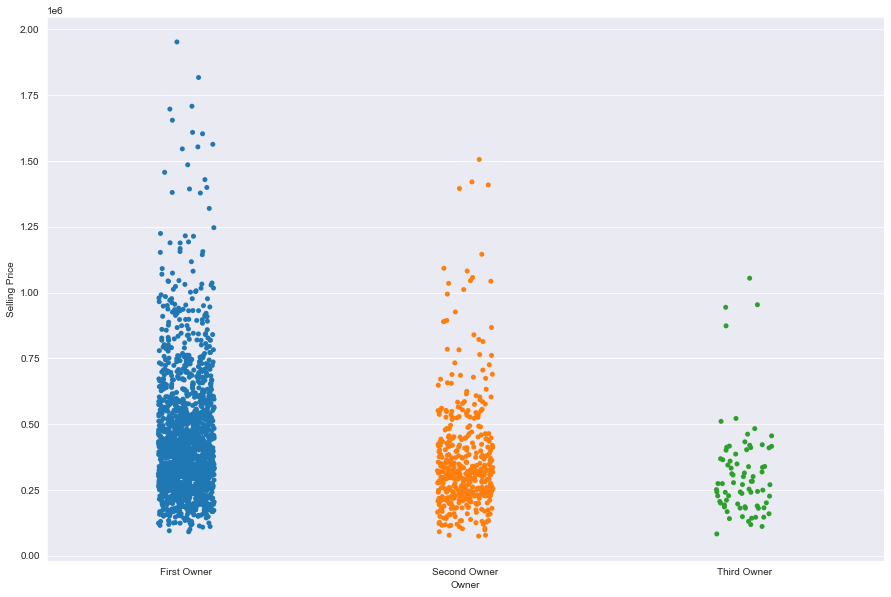

In [23]:
fig, _ = plt.subplots()
fig.set_size_inches(15, 10)
sns.stripplot(x = 'Owner', y ='Selling Price', data = car_data) 

Each time it changes 'Owner' the 'Selling Price' decreases further.

Now that we have visualized the dataset, we can start to treat it and prepare a final model to test.

In [24]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 10 columns):
Model                2235 non-null object
Selling Price        2235 non-null int64
Kilometers Driven    2235 non-null int64
Year                 2235 non-null int64
Owner                2235 non-null object
Fuel Type            2235 non-null object
Transmission         2235 non-null object
Insurance            2221 non-null object
Car Condition        2235 non-null float64
Current Price        2235 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 174.7+ KB


Let's use One-hot-encoding to treat fuel type:

In [25]:
Fuel_Type_f = car_data[['Fuel Type']]
Fuel_Type_f = pd.get_dummies(Fuel_Type_f,drop_first=True)
Fuel_Type_f.head()

,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


Let's treat the transmission as Automatic or Manual: 

In [26]:
Transmission_f = car_data['Transmission'].apply(lambda x: 'AUTOMATIC' if x=='AUTOMATIC' else 'MANUAL')
Transmission_f = pd.get_dummies(Transmission_f)

Transmission_f.head()

,AUTOMATIC,MANUAL
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


* 1- First Owner
* 2- Second Owner
* 3- Third Owner

In [27]:
car_data.replace(to_replace ="First Owner", value = 1, inplace = True)
car_data.replace(to_replace ="Second Owner", value = 2, inplace = True)
car_data.replace(to_replace ="Third Owner", value = 3, inplace = True)
car_data.head()

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition,Current Price
0,MarutiWagonR1.0LXI,312165,82238,2014,1,Petrol + CNG,MANUAL,Expired,4.2,Rs.4.65 Lakh
1,MarutiWagonR1.0LXI,242499,88514,2015,2,Petrol + CNG,MANUAL,26-07-2021,4.4,Rs.4.65 Lakh
2,MarutiWagonR1.0LXI,381699,29735,2017,2,Petrol + CNG,MANUAL,18-09-2021,4.3,Rs.4.65 Lakh
3,MarutiWagonR1.0LXI,181999,153709,2013,1,Petrol + CNG,MANUAL,25-05-2021,4.1,Rs.4.65 Lakh
4,MarutiWagonR1.0LXI,239499,88691,2012,2,Petrol + CNG,MANUAL,15-10-2021,4.4,Rs.4.65 Lakh


Now lets treat 'Insurance', where we will set the number of days left of insurance for a given model at the time of creation of this given dataset.

In [28]:
from datetime import datetime

startDate = '20-02-2021'
startDate = datetime.strptime(startDate, '%d-%m-%Y')

car_data['Insurance'] = car_data['Insurance'].fillna('Expired')

for i in car_data['Insurance'].unique():
    if (i == 'Expired' or i == 'Comp' or i == 'Third_party' or i == 'Zero_Dep' or i == 'Zero Depreciation' or i=='Insurance Expired' or i == 'Comprehensive' or i == '3rd Party'):
        car_data.replace(to_replace=i, value=0, inplace = True)
    else:
        date = datetime.strptime(i, '%d-%m-%Y')
        delta = startDate - date
        if(delta.days < 0):
            car_data.replace(to_replace=i, value=0, inplace = True)
        else:
            car_data.replace(to_replace=i, value=delta.days, inplace = True)
car_data['Insurance'].unique()

array([  0,  18,  24, 163, 135,  19,  36,   6,  15, 168,  81,  52, 384,
       272,   3,  37,   8,  21,  64,  50, 162,  71,   4,  13,   1,  49,
        31,  43,  28,  46,  94,  14, 242,  11,   2,  27,  17,  16,  95,
       153,  45,  42,  32,   5,  29,  44, 123,  33, 418,  41,  35,  48,
        99,  12,  73,  55,  22, 336,  88,  47,  30,   9,  62,  83, 104,
        40,  57,  25,  97, 111,  20, 350,  59,  53, 186,  66,  51,  10,
        26,  76, 132,  77,  34,  39,  74, 367,  75,  54,  65, 105, 227,
        78,  86,  84,  61,  69, 202, 143,   7,  38, 252, 199, 145, 215,
        92], dtype=int64)

Now lets convert the coin from Indian Rupees to American Dollars on the atribute 'Selling Price'

In [29]:
def convertToDolar(row):
    return row * 0.01332

car_data['Selling Price'] = car_data['Selling Price'].apply(convertToDolar)

Now lets convert the coin from Indian Rupees to American Dollars on the atribute 'Current Price'

In [30]:
units = ['Lakh','Lakhs','Rs.',',']

def converToDolar2(row):
    if type(row) is str:
        mult = 1
        if units[0] in row or units[1] in row:
            mult = 100000
        for j in units:
            row = row.replace(j,'')
        return float(row) * mult * 0.01332
    elif type(row) is float:
        return row * 0.01332


car_data['Current Price'] = car_data['Current Price'].apply(converToDolar2)

Now let's fetch the car models name and add it as the atribute 'Company':

Analyzing the dataset we can conclude that from the atribute 'Model' capturing the first word until the next capitalized letter we can obtain the company of the model.

In [31]:
import re
car_data['Company'] = car_data['Model'].apply(lambda x: re.findall(r"[A-Z][^A-Z]*", x) [0])

In [32]:
car_data['Company'].unique()

array(['Maruti', 'Toyota', 'Hyundai', 'Honda', 'Volkswagen', 'Hyundaii20',
       'Mahindra', 'Tata', 'Renault', 'Ford', 'Hyundaii10', 'Nissan',
       'Datsun', 'Chevrolet', 'Skoda', 'Audi', 'B', 'Fiat', 'Mercedes',
       'M', 'Ssangyong', 'Jeep'], dtype=object)

We can see that we need to capture the specific model's company where the main regex condition fails

In [33]:
car_data['Company']=car_data['Company'].apply(lambda x: 'Hyundai' if x =='Hyundaii20' else x)
car_data['Company']=car_data['Company'].apply(lambda x: 'Hyundai' if x =='Hyundaii10' else x)
car_data['Company']=car_data['Company'].apply(lambda x: 'BMW' if x is 'B' else x)
car_data['Company']=car_data['Company'].apply(lambda x: 'MGHECTORSHARPDCT' if x is 'M' else x)
car_data['Company'].unique()

array(['Maruti', 'Toyota', 'Hyundai', 'Honda', 'Volkswagen', 'Mahindra',
       'Tata', 'Renault', 'Ford', 'Nissan', 'Datsun', 'Chevrolet',
       'Skoda', 'Audi', 'BMW', 'Fiat', 'Mercedes', 'MGHECTORSHARPDCT',
       'Ssangyong', 'Jeep'], dtype=object)

In [34]:
Company_f = car_data[['Company']]
Company_f = pd.get_dummies(Company_f,drop_first=True)
Company_f.head()

,Company_BMW,Company_Chevrolet,Company_Datsun,Company_Fiat,Company_Ford,Company_Honda,Company_Hyundai,Company_Jeep,Company_MGHECTORSHARPDCT,Company_Mahindra,Company_Maruti,Company_Mercedes,Company_Nissan,Company_Renault,Company_Skoda,Company_Ssangyong,Company_Tata,Company_Toyota,Company_Volkswagen
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [35]:
car_data.head()

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition,Current Price,Company
0,MarutiWagonR1.0LXI,4158.03780,82238,2014,1,Petrol + CNG,MANUAL,0,4.2,6193.8,Maruti
1,MarutiWagonR1.0LXI,3230.08668,88514,2015,2,Petrol + CNG,MANUAL,0,4.4,6193.8,Maruti
2,MarutiWagonR1.0LXI,5084.23068,29735,2017,2,Petrol + CNG,MANUAL,0,4.3,6193.8,Maruti
3,MarutiWagonR1.0LXI,2424.22668,153709,2013,1,Petrol + CNG,MANUAL,0,4.1,6193.8,Maruti
4,MarutiWagonR1.0LXI,3190.12668,88691,2012,2,Petrol + CNG,MANUAL,0,4.4,6193.8,Maruti


Now let's gather all the atributes that we will use onto a single dataset:

In [36]:
car_data_f = pd.concat([car_data[['Selling Price','Kilometers Driven','Year','Owner','Insurance','Car Condition','Current Price']], Fuel_Type_f, Company_f ,Transmission_f], axis=1, sort=False)

Now let's deal with outliers:

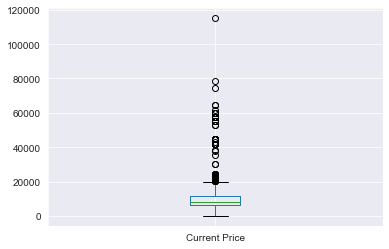

In [37]:
car_data_f.boxplot(column='Current Price')

In [38]:
#REMOVER OUTLIERS 
from scipy.stats.mstats import winsorize
#tmp=car_data_f

#tmp['Current Price']=winsorize(car_data_f['Current Price'],(0,0.001))

car_data_f['Selling Price']=winsorize(car_data_f['Selling Price'],(0,0.03))
car_data_f['Kilometers Driven']=winsorize(car_data_f['Kilometers Driven'],(0,0.001))
car_data_f['Current Price']=winsorize(car_data_f['Current Price'],(0,0.001))

#tmp.boxplot(column='Current Price')

Correlation Matrix:

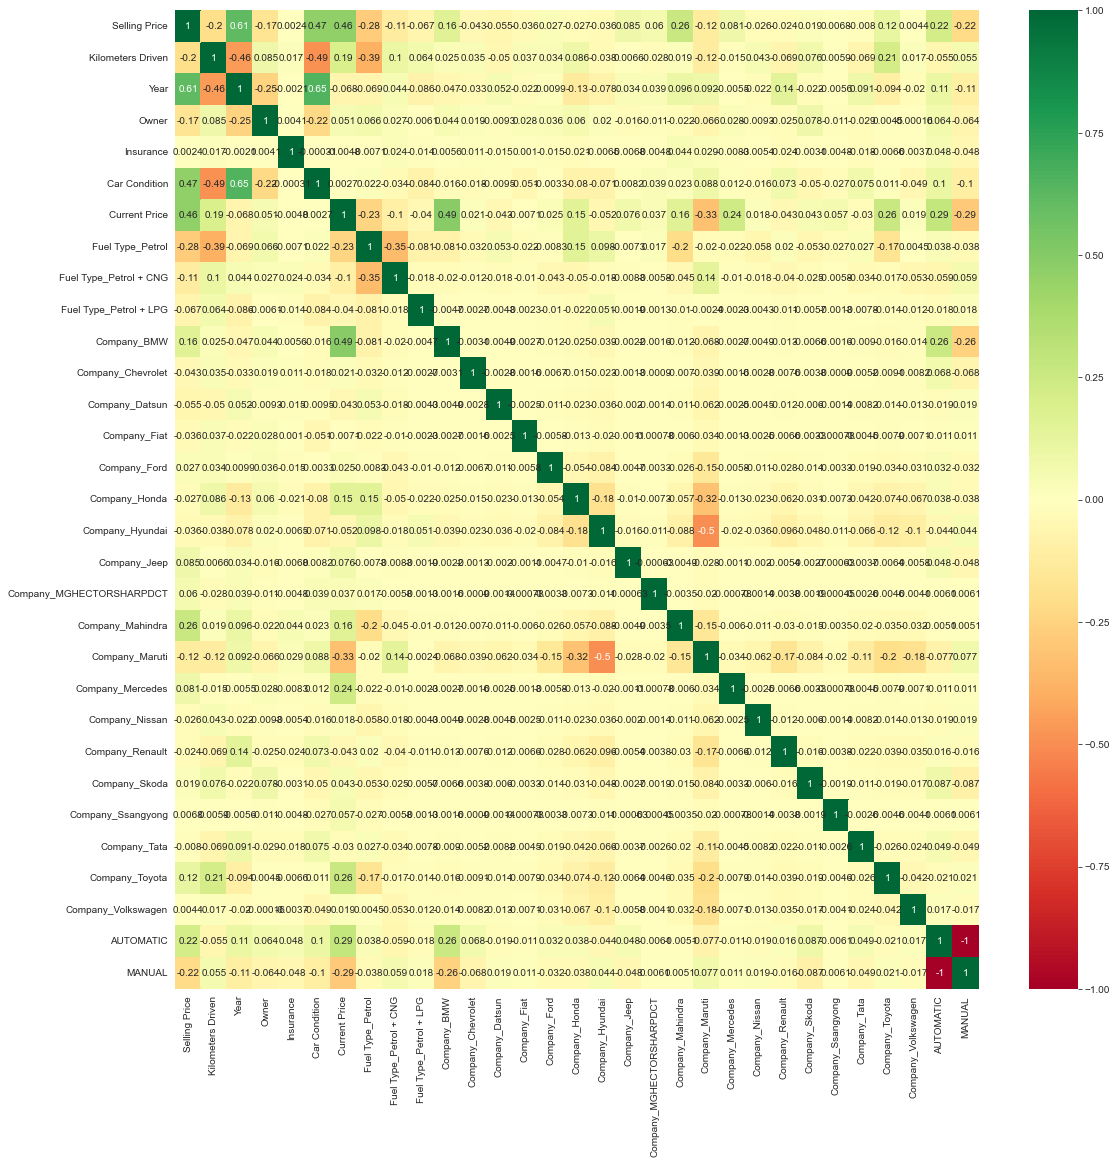

In [39]:
plt.figure(figsize=(18,18))
sns.heatmap(car_data_f.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [40]:
car_data_f.head()

,Selling Price,Kilometers Driven,Year,Owner,Insurance,Car Condition,Current Price,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG,...,Company_Mercedes,Company_Nissan,Company_Renault,Company_Skoda,Company_Ssangyong,Company_Tata,Company_Toyota,Company_Volkswagen,AUTOMATIC,MANUAL
0,4158.03780,82238,2014,1,0,4.2,6193.8,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,3230.08668,88514,2015,2,0,4.4,6193.8,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,5084.23068,29735,2017,2,0,4.3,6193.8,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2424.22668,153709,2013,1,0,4.1,6193.8,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,3190.12668,88691,2012,2,0,4.4,6193.8,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
car_data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 31 columns):
Selling Price               2235 non-null float64
Kilometers Driven           2235 non-null int64
Year                        2235 non-null int64
Owner                       2235 non-null int64
Insurance                   2235 non-null int64
Car Condition               2235 non-null float64
Current Price               2235 non-null float64
Fuel Type_Petrol            2235 non-null uint8
Fuel Type_Petrol + CNG      2235 non-null uint8
Fuel Type_Petrol + LPG      2235 non-null uint8
Company_BMW                 2235 non-null uint8
Company_Chevrolet           2235 non-null uint8
Company_Datsun              2235 non-null uint8
Company_Fiat                2235 non-null uint8
Company_Ford                2235 non-null uint8
Company_Honda               2235 non-null uint8
Company_Hyundai             2235 non-null uint8
Company_Jeep                2235 non-null uint8
Company_MGHECTORSHARPDC

All our atributes are numerical and there are no null values.

Let's build the model, first we need to split the data into test and train.

In [42]:
X = car_data_f.drop('Selling Price', axis=1)
y = car_data_f[['Selling Price']]

In here we normalize the data. so we scale the values to have a value between 0 and 1 on all atributes.

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler(feature_range=(0,1)).fit(X)
scaler_y = MinMaxScaler(feature_range=(0,1)).fit(y)
X_scaled = pd.DataFrame(scaler_X.transform(X[X.columns]),columns=X.columns)
y_scaled = pd.DataFrame(scaler_y.transform(y[y.columns]),columns=y.columns)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled , test_size = 0.2, random_state = 2021)

First lets try Linear Regression:

In [45]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Training set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Training set:  0.7066989987941852
Accuracy on Testing set:  0.7178342361070585


In [46]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
print("Accuracy on Training set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

C:\Users\luisn\.conda\envs\daa2\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy on Training set:  0.9810127503614654
Accuracy on Testing set:  0.8850295700555009


In [47]:
# let's unscale the model to see real prices
y_pred_unscaled = scaler_y.inverse_transform(y_pred.reshape(y_pred.shape[0], 1))
# let's unscale y_test to get the original values
y_test_unscaled = scaler_y.inverse_transform(y_test)

In [48]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test_unscaled, y_pred_unscaled))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test_unscaled, y_pred_unscaled))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test_unscaled, y_pred_unscaled)))
print('R Squared Error          : ', metrics.r2_score(y_test_unscaled, y_pred_unscaled))

		Error Table
Mean Absolute Error      :  704.2102687087248
Mean Squared  Error      :  871458.8472637614
Root Mean Squared  Error :  933.5196019708218
R Squared Error          :  0.8850295700555009


Now let's try using Grid Search:

In [80]:
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    #from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    #return grid.best_score_ , grid.best_params_
    return grid.best_params_

def RFR(X_train, X_test, y_train, y_test, best_params):
    from sklearn.ensemble import RandomForestRegressor
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    #print("R2 score: ", r2_score(y_test,y_predict))
    return y_predict


In [84]:
y_predict_GS = RFR(X_train, X_test, y_train, y_test, Grid_Search_CV_RFR(X_train,y_train))


C:\Users\luisn\.conda\envs\daa2\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\luisn\.conda\envs\daa2\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [97]:
from sklearn.metrics import r2_score
print("Accuracy on Training set: ", r2_score(y_test,y_predict_GS))

Accuracy on Training set:  0.883343168186515


In [85]:
#restoring data to the real values
y_predict_GS = y_predict_GS.reshape(y_predict_GS.shape[0], 1)
y_predict_GS_unscaled = scaler_y.inverse_transform(y_predict_GS)
y_test_unscaled = scaler_y.inverse_transform(y_test)

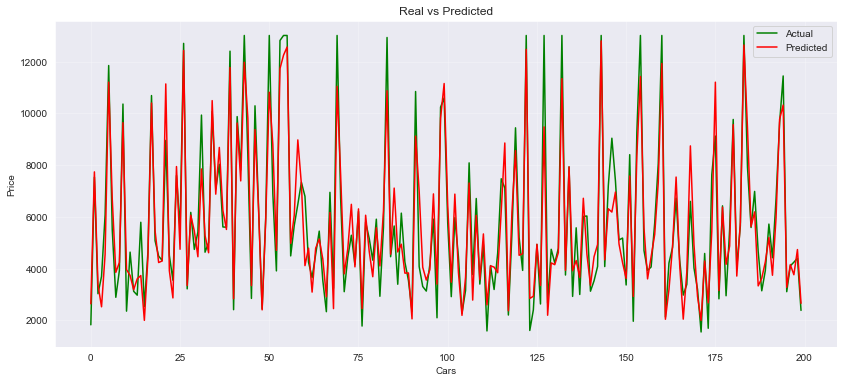

In [88]:
# Visualising the actual and predicted result
def real_predicted_viz(limit):
    plt.figure(figsize=(14,6))
    plt.plot(y_test_unscaled[:limit], color = 'green', label = 'Actual')
    plt.plot(y_predict_GS_unscaled[:limit], color = 'red', label = 'Predicted')
    plt.grid(alpha = 0.3)
    plt.xlabel('Cars')
    plt.ylabel('Price')
    plt.title('Real vs Predicted')
    plt.legend()
    plt.show()

# Let's limit to 200 comparisons for better visualization
real_predicted_viz(200)